In [36]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#read_csv() is a pandas function to read csv files
data = pd.read_csv(r"C:\Users\ACER\Desktop\data science\financial risk mgmt\Data\german_credit_data.csv")


In [38]:
#head() method is used to return top n (5 by default) rows of a DataFrame or series
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [356]:
data=data.drop(["Unnamed: 0",],axis=1)

In [39]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   818 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [41]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [42]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     182
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

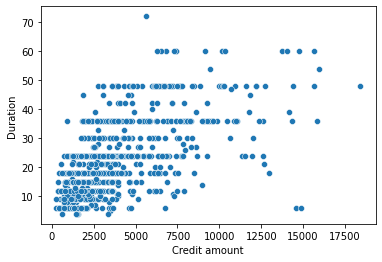

In [43]:
sns.scatterplot(x="Credit amount",y="Duration",data = data)

<AxesSubplot:xlabel='Risk', ylabel='Credit amount'>

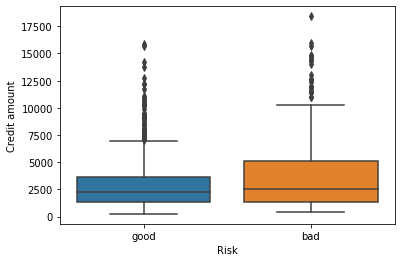

In [44]:
sns.boxplot(x="Risk",y="Credit amount",data = data)

<AxesSubplot:>

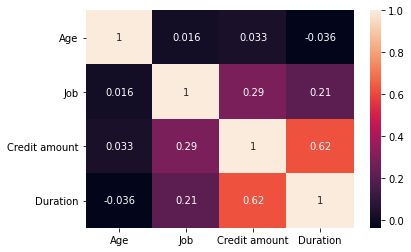

In [46]:
sns.heatmap(data.corr(), annot=True)

In [47]:
data["Checking account"].fillna(data["Checking account"].mode()[0] , inplace =True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0] , inplace =True)

In [48]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [49]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


<AxesSubplot:>

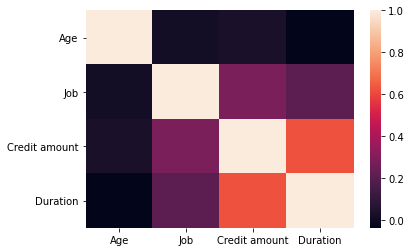

In [50]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values )

ValueError: markers must be a singleton or a list of markers for each level of the hue variable

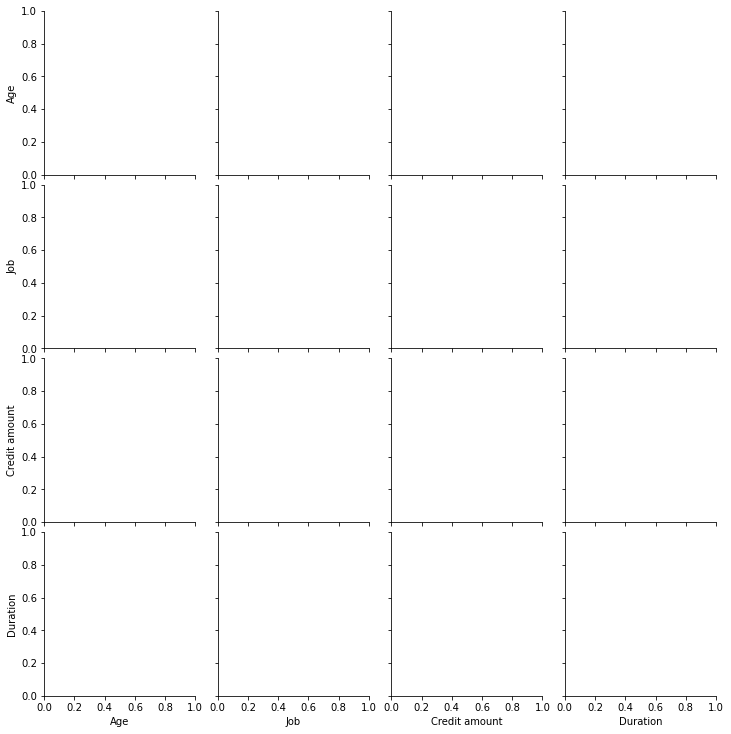

In [369]:
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

In [ ]:
data.drop(["Age"], axis = 1, inplace = True)

In [ ]:
data

In [ ]:
data["Housing"].unique()

In [ ]:
data["Saving accounts"].unique()

In [15]:
data["Job"].unique()

array([2, 1, 3, 0], dtype=int64)

In [51]:
data["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Housing"] = le.fit_transform(data["Housing"])
data["Checking account"] = le.fit_transform(data["Checking account"])
data["Purpose"] = le.fit_transform(data["Purpose"])
data["Risk"] = le.fit_transform(data["Risk"])
data["Saving accounts"] = le.fit_transform(data["Saving accounts"])

In [53]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [54]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [55]:
#Dependent Variables
x=data.iloc[:,[0,1,2,3,4,6]]
x=pd.DataFrame(x,columns=['Age','Sex', 'Job', 'Housing', 'Saving accounts',
       'Credit amount'])
x

,Age,Sex,Job,Housing,Saving accounts,Credit amount
0,67,1,2,1,0,1169
1,22,0,2,1,0,5951
2,49,1,1,1,0,2096
3,45,1,2,0,0,7882
4,53,1,2,0,0,4870
...,...,...,...,...,...,...
995,31,0,1,1,0,1736
996,40,1,3,1,0,3857
997,38,1,2,1,0,804
998,23,1,2,0,0,1845


In [56]:
#Dependent Variables
y=data.iloc[:,9]
y=pd.DataFrame(y,columns=['Risk'])
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [57]:
x.shape

(1000, 6)

In [58]:
y.shape

(1000, 1)

In [59]:
from collections import Counter
Counter(data["Risk"])

Counter({1: 700, 0: 300})

In [60]:
from collections import Counter
Counter(y)

Counter({'Risk': 1})

In [61]:
x

,Age,Sex,Job,Housing,Saving accounts,Credit amount
0,67,1,2,1,0,1169
1,22,0,2,1,0,5951
2,49,1,1,1,0,2096
3,45,1,2,0,0,7882
4,53,1,2,0,0,4870
...,...,...,...,...,...,...
995,31,0,1,1,0,1736
996,40,1,3,1,0,3857
997,38,1,2,1,0,804
998,23,1,2,0,0,1845


In [62]:
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [63]:
data["Sex"].unique()

array([1, 0])

In [64]:
data["Housing"].unique()

array([1, 0, 2])

In [65]:
data["Purpose"].unique()

array([5, 3, 4, 1, 0, 2, 6, 7])

In [66]:
data["Saving accounts"].unique()

array([0, 2, 3, 1])

In [463]:
x.shape

(1000, 6)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [69]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'criterion':['entropy','gini'],
     'max_depth':range(2,10,1),
   'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [70]:
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_params,
                        cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

NameError: name 'dtc' is not defined

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtrcv=DecisionTreeClassifier(criterion='entropy',max_depth=3,
 min_samples_leaf= 7,
 min_samples_split= 2,
 splitter='best')
dtrcv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7)

In [72]:
y_pred = dtrcv.predict(x_test)

In [73]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [74]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

In [75]:
acc

0.665

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [77]:
cm

array([[  8,  50],
       [ 17, 125]], dtype=int64)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators = 10, criterion = "entropy",random_state=0)
rfc.fit(x_train,y_train)

C:\Users\ACER\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [79]:
y_pred1= rfc.predict(x_test)

In [80]:
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1])

In [81]:
acc1 = accuracy_score(y_test,y_pred1)

In [82]:
acc1

0.65

In [83]:
cm1 = confusion_matrix(y_test,y_pred1)

In [84]:
cm1

array([[ 19,  39],
       [ 31, 111]], dtype=int64)

In [85]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train,y_train)

C:\Users\ACER\.conda\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [ ]:
import pickle
pickle.dump(svm,open("risk.pkl" , "wb"))

In [86]:
y_pred2 = svm.predict(x_test)

In [269]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [270]:
y_test

,Risk
993,1
859,1
298,1
553,1
672,1
...,...
679,1
722,0
215,1
653,0


In [271]:
acc2 = accuracy_score(y_test,y_pred2)

In [272]:
acc2

0.71

In [273]:
cm2 = confusion_matrix(y_test,y_pred2)

In [274]:
cm2

array([[  0,  58],
       [  0, 142]], dtype=int64)

In [275]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [276]:
nb.fit(x_train,y_train)

C:\Users\Tulasi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [277]:
nbpred = nb.predict(x_test) 

In [278]:
nbpred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1])

In [279]:
y_test

,Risk
993,1
859,1
298,1
553,1
672,1
...,...
679,1
722,0
215,1
653,0


In [280]:
nbacc = accuracy_score(y_test,  nbpred)

In [281]:
nbacc

0.715

In [282]:
nbcm= confusion_matrix(y_test,  nbpred)

In [283]:
nbcm

array([[ 12,  46],
       [ 11, 131]], dtype=int64)

In [284]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

C:\Users\Tulasi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [285]:
lrpred = lr.predict(x_test)

In [199]:
lrpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [200]:
y_test

,Risk
993,1
859,1
298,1
553,1
672,1
...,...
679,1
722,0
215,1
653,0


In [201]:
lracc = accuracy_score(y_test,lrpred)

In [202]:
lracc

0.72

In [203]:
lrcm = confusion_matrix(y_test,lrpred)

In [204]:
lrcm

array([[  5,  53],
       [  3, 139]], dtype=int64)

In [480]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709583 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.709167 (0.018238) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.709167 (0.018238) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.709167 (0.018238) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.709167 (0.018238) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.709167 (0.018238) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.709167 (0.018238) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.709167 (0.018238) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.709167 (0.018238) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.709583 (0.018451) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.706667 (0.014696) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.706667 (0.014696) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.708750 (0.017124) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.699167 (0.009091) wit

C:\Users\Tulasi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
